# DraCor API: first steps

This short chapter shows how to list DraCor corpora and peek at a few plays via the HTTP API using a tiny helper (`utils/dracor_client.py`).

> **Learning goals**
> - Call the DraCor API from Python.
> - List available corpora and preview plays.
>
> **Requirements**
> - Basic Python; internet connection.
>
> **What you'll do**
> 1) Import a small API helper. 2) Fetch corpora. 3) Count plays in a few corpora.
>
> **Exercise (at the end)**
> - Repeat for different corpora; compare sizes and languages.

In [1]:
# Make project root importable so `from utils import dracor_client` works
import os, sys
from pathlib import Path

# If running the .ipynb from docs/, go one level up to project root
PROJECT_ROOT = Path.cwd()
if (PROJECT_ROOT / "docs").exists():
    PROJECT_ROOT = PROJECT_ROOT

# Handle cases where the CWD is docs/ or the book’s build dir
candidates = [
    PROJECT_ROOT,                  # when running in docs/
    PROJECT_ROOT.parent,           # when running at project root
    Path(__file__).resolve().parents[1] if "__file__" in globals() else None
]
for p in [c for c in candidates if c]:
    if (p / "utils" / "dracor_client.py").exists():
        sys.path.insert(0, str(p))
        break


In [2]:
# Setup (pretty display and imports)
import pandas as pd
pd.set_option("display.max_colwidth", 80)
pd.set_option("display.precision", 0)

from utils import dracor_client as dc
from datetime import datetime
print("Last run:", datetime.utcnow().strftime("%Y-%m-%d %H:%M UTC"))

Last run: 2025-08-27 14:03 UTC


/var/folders/84/8bnpqjtx4gdbqmjxlnf650vw0000gn/T/ipykernel_60023/1323785047.py:8: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  print("Last run:", datetime.utcnow().strftime("%Y-%m-%d %H:%M UTC"))


In [3]:
# 1) Fetch all corpora
corpora = dc.corpora()
len(corpora), corpora[:2]  # quick sanity check (length + first 2 items)

(21,
 [{'description': 'Edited by Pablo Ruiz Fabo ([MeThAL project](https://methal.pages.unistra.fr/) at University of Strasbourg). Features a growing number of Alsation plays from the 19th and 20th century. For a corpus description and full credits please see the [README on GitHub](https://github.com/dracor-org/alsdracor).',
   'commit': '3845f3d0fe1fe40d2fee15974235dbcc912f96ca',
   'uri': 'https://dracor.org/api/v1/corpora/als',
   'title': 'Alsatian Drama Corpus',
   'repository': 'https://github.com/dracor-org/alsdracor',
   'name': 'als',
   'acronym': 'AlsDraCor'},
  {'description': 'Edited by Dennis Mischke, Luca Giovannini, Daniil Skorinkin. A vanilla corpus is being prepared for DH2024.',
   'commit': 'ceabc51c4068feb3e42b8ba343f774ef648ce8c0',
   'uri': 'https://dracor.org/api/v1/corpora/am',
   'title': 'American Drama Corpus',
   'repository': 'https://github.com/dracor-org/amdracor',
   'name': 'am',
   'acronym': 'AmDraCor'}])

In [4]:
# 2) Put corpora into a tidy DataFrame
df_corpora = pd.DataFrame(corpora)
# Different corpora may expose different metadata; keep safe columns.
keep = [c for c in ["id", "name", "description", "languages"] if c in df_corpora.columns]
df_corpora[keep].head().style.set_properties(**{"text-align": "left"})

,name,description
0,als,Edited by Pablo Ruiz Fabo ([MeThAL project](https://methal.pages.unistra.fr/) at University of Strasbourg). Features a growing number of Alsation plays from the 19th and 20th century. For a corpus description and full credits please see the [README on GitHub](https://github.com/dracor-org/alsdracor).
1,am,"Edited by Dennis Mischke, Luca Giovannini, Daniil Skorinkin. A vanilla corpus is being prepared for DH2024."
2,bash,Edited by Boris Orekhov. Contains a growing number of plays in the Bashkir language. Works still under copyright published with the permission of the rights holders.
3,cal,Edited by members of the [Institute of Romance Languages and Literatures at University of Tübingen](https://uni-tuebingen.de/en/fakultaeten/philosophische-fakultaet/fachbereiche/neuphilologie/romanisches-seminar/home/) and the [Institute of Romance Studies at University of Vienna](https://romanistik.univie.ac.at/). For a corpus description and full credits please see the [README on GitHub](https://github.com/dracor-org/caldracor).
4,dutch,Edited by Lucas van der Deijl. Features 180 Dutch-language plays from 1539-1786. For a corpus description and full credits please see the [README on GitHub](https://github.com/dracor-org/dutchdracor).


## How many plays per corpus?
Let’s sample a handful of corpora and count how many plays each contains.

In [5]:
sample = corpora[:6]  # take the first six corpora for a quick preview
rows = []
for c in sample:
    cid = c.get("id")
    try:
        plays = dc.corpus_plays(cid)
        rows.append({"corpus": cid, "n_plays": len(plays)})
    except Exception as e:
        rows.append({"corpus": cid, "n_plays": None, "error": str(e)[:60]})
pd.DataFrame(rows)

,corpus,n_plays,error
0,None,None,400 Client Error: Bad Request for url: https://dracor.org/ap
1,None,None,400 Client Error: Bad Request for url: https://dracor.org/ap
2,None,None,400 Client Error: Bad Request for url: https://dracor.org/ap
3,None,None,400 Client Error: Bad Request for url: https://dracor.org/ap
4,None,None,400 Client Error: Bad Request for url: https://dracor.org/ap
5,None,None,400 Client Error: Bad Request for url: https://dracor.org/ap


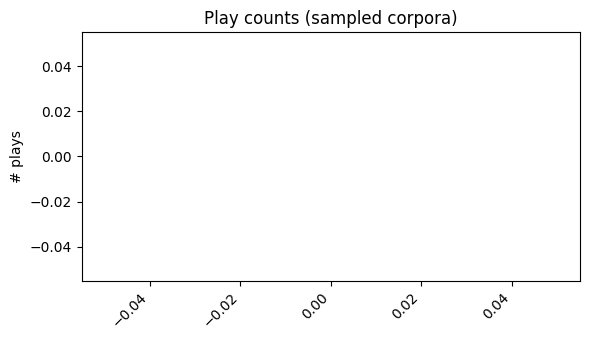

In [6]:
# 3) Small bar chart (top: first six corpora)
import matplotlib.pyplot as plt
counts = pd.DataFrame(rows).dropna(subset=["n_plays"]).sort_values("n_plays", ascending=False)
plt.figure(figsize=(6,3.5))
plt.bar(counts["corpus"], counts["n_plays"]) 
plt.title("Play counts (sampled corpora)")
plt.ylabel("# plays")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Exercise

1. Change `sample = corpora[:6]` to something like `sample = [c for c in corpora if c['id'] in ['ger', 'rus', 'ita']]`.
2. Re-run the counting cell. Which corpus has the most plays?
3. Optional: fetch the plays for one corpus (`dc.corpus_plays('ger')`) and list the first 5 titles as a table.

> **Takeaways**
> - You can access DraCor corpora and plays with a few lines of code.
> - Keeping results in tidy DataFrames makes quick summaries and plots trivial.
> - In later chapters we’ll navigate plays, characters, and networks in more detail.